## Machine Learning Models

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
#from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.metrics import log_loss
import seaborn as sns
from sklearn.metrics import precision_recall_curve, auc, roc_curve
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
import xgboost as xgb

In [4]:
learning_data = pd.read_csv('final_features.csv')

In [5]:
learning_data.columns.to_list()

['Unnamed: 0',
 'Unnamed: 0_x',
 'frequency_of_question1',
 'frequency_of_question2',
 'character_in_question1',
 'character_in_question2',
 'word_in_question1',
 'word_in_question2',
 'common_words_in_both_questions',
 'total_words_in_both_questions',
 'common_share_word_percentage',
 'sum_of_frequency',
 'difference_of_frequency',
 'is_duplicate_x',
 'id',
 'Unnamed: 0_y',
 'common_word_count_min',
 'common_word_count_max',
 'common_stop_count_min',
 'common_stop_count_max',
 'common_token_count_min',
 'common_token_count_max',
 'is_first_token_match',
 'is_last_token_match',
 'mean_token',
 'fuzz_ratio',
 'fuzz_partial_ratio',
 'fuzz_sort_ratio',
 'fuzz_set_ratio',
 'lcs_token_min',
 'is_duplicate_y',
 '0_x',
 '1_x',
 '2_x',
 '3_x',
 '4_x',
 '5_x',
 '6_x',
 '7_x',
 '8_x',
 '9_x',
 '10_x',
 '11_x',
 '12_x',
 '13_x',
 '14_x',
 '15_x',
 '16_x',
 '17_x',
 '18_x',
 '19_x',
 '20_x',
 '21_x',
 '22_x',
 '23_x',
 '24_x',
 '25_x',
 '26_x',
 '27_x',
 '28_x',
 '29_x',
 '30_x',
 '31_x',
 '32_x',

In [6]:
learning_data.shape

(404290, 223)

In [7]:
learning_data = learning_data.drop(columns = ['Unnamed: 0', 'Unnamed: 0_x', 'Unnamed: 0_y', 'is_duplicate_x', 'id'])
y_true = learning_data["is_duplicate_y"]
learning_data = learning_data.drop(columns = ['is_duplicate_y'])
data = learning_data
learning_data.shape

(404290, 217)

In [8]:
X_train,X_test, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.3)

In [9]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Log loss on Test Data using Random Model 0.8848972100288384


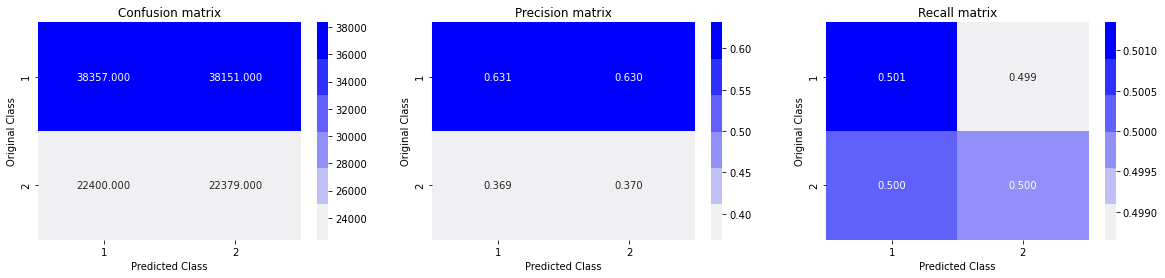

In [10]:
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((len(y_test),2))
for i in range(len(y_test)):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

/Users/ashutoshkumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/ashutoshkumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/ashutoshkumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/ashutoshkumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_grad

For values of alpha =  1e-05 The log loss is: 0.45555303682207043


/Users/ashutoshkumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/ashutoshkumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


For values of alpha =  0.0001 The log loss is: 0.45899281145057275
For values of alpha =  0.001 The log loss is: 0.44860617156229177
For values of alpha =  0.01 The log loss is: 0.4242271812914657
For values of alpha =  0.1 The log loss is: 0.4458602874654045
For values of alpha =  1 The log loss is: 0.47663748594066174
For values of alpha =  10 The log loss is: 0.5187385481261869


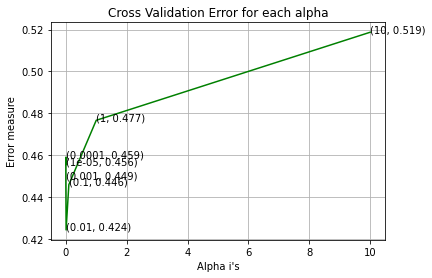

For values of best alpha =  0.01 The train log loss is: 0.4230770125083063
For values of best alpha =  0.01 The test log loss is: 0.4242271812914657
Total number of data points : 121287


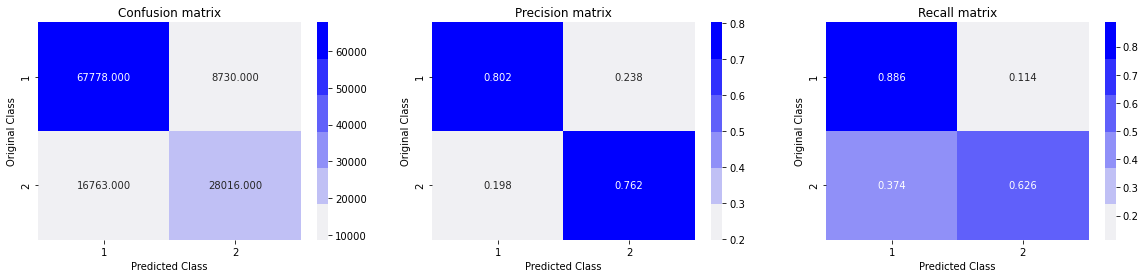

In [11]:
alpha = [10 ** x for x in range(-5, 2)] 
# hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

/Users/ashutoshkumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


For values of alpha =  1e-05 The log loss is: 0.45077684455711275
For values of alpha =  0.0001 The log loss is: 0.44846456570459475


/Users/ashutoshkumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/ashutoshkumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/ashutoshkumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/ashutoshkumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_grad

For values of alpha =  0.001 The log loss is: 0.5141076938839068


/Users/ashutoshkumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/ashutoshkumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/ashutoshkumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/ashutoshkumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_grad

For values of alpha =  0.01 The log loss is: 0.5258930748795293


/Users/ashutoshkumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/ashutoshkumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/ashutoshkumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/ashutoshkumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_grad

For values of alpha =  0.1 The log loss is: 0.5103808297003668


/Users/ashutoshkumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/ashutoshkumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/ashutoshkumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/ashutoshkumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_grad

For values of alpha =  1 The log loss is: 0.5740706575309006
For values of alpha =  10 The log loss is: 0.6119224049076769


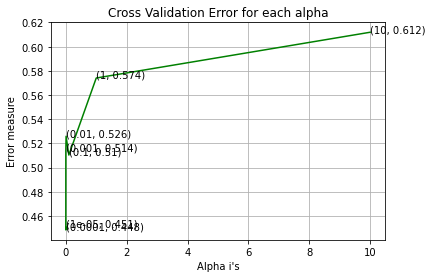

For values of best alpha =  0.0001 The train log loss is: 0.44880699126034584
For values of best alpha =  0.0001 The test log loss is: 0.44846456570459475
Total number of data points : 121287


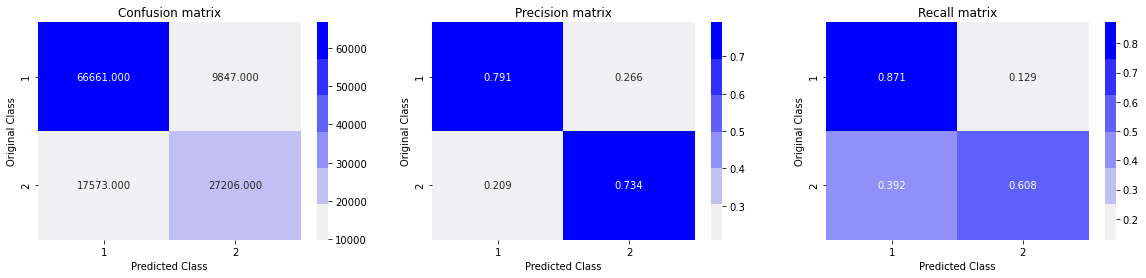

In [12]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [22]:
# https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'eta': [0.0001, 0.001, 0.01]
        }

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',silent=True, nthread=1)
folds = 5
param_comb = 6
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
random_search = RandomizedSearchCV(xgb, param_distributions=params, 
                                   n_iter=param_comb, scoring='roc_auc', n_jobs=-1,
                                   cv=skf.split(X_train, y_train), verbose=3, random_state=1001 )
# Here we go
#start_time = timer(None) 
# timing starts from this point for "start_time" variable
random_search.fit(X_train, y_train)
#timer(start_time)
   

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed: 363.5min remaining: 55.9min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 375.4min finished
/Users/ashutoshkumar/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:43:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:43:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7fef83b15820>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing...
                                           scale_pos_weight=None, silent=True,
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                        

In [23]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)


 All results:
{'mean_fit_time': array([6712.58126564, 7361.7879962 , 8298.67175088, 4003.54989777,
       4384.72307434, 3427.26157308]), 'std_fit_time': array([ 11.15506732,  47.91512562,   6.90561948,  16.32049499,
        23.14229975, 329.76349949]), 'mean_score_time': array([1.78521252, 1.635285  , 1.75499077, 1.45080371, 1.4096952 ,
       0.60716448]), 'std_score_time': array([0.10390328, 0.14411031, 0.07000257, 0.07741124, 0.10249857,
       0.13782253]), 'param_subsample': masked_array(data=[0.8, 1.0, 0.8, 0.8, 1.0, 0.6],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 5, 10, 10, 1, 1],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[4, 4, 5, 4, 4, 4],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'par

In [27]:
# XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=1.0, eta=0.01, gamma=5,
#               gpu_id=-1, importance_type='gain', interaction_constraints='',
#               learning_rate=0.02, max_delta_step=0, max_depth=5,
#               min_child_weight=10, missing=nan, monotone_constraints='()',
#               n_estimators=600, n_jobs=1, nthread=1, num_parallel_tree=1,
#               random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
#               silent=True, subsample=0.8, tree_method='exact',
#               validate_parameters=1, verbosity=None)
params = {
            "base_score":0.5, "booster":"gbtree", "colsample_bylevel":1,
              "colsample_bynode":1, "colsample_bytree":1.0, "eta":0.01, "gamma":5,
              "gpu_id":-1, "importance_type":"gain", 
              "learning_rate":0.02, "max_delta_step":0, "max_depth":5,
              "min_child_weight":10, 
                "n_estimators":600, "n_jobs":-1, "nthread":1, "num_parallel_tree":1,
              "random_state":0, "reg_alpha":0, "reg_lambda":1, "scale_pos_weight":1,
               "subsample":0.8, "tree_method":"exact"
}

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[05:56:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "importance_type", "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:0.49549	valid-rmse:0.49560
[10]	train-rmse:0.45838	valid-rmse:0.45855
[20]	train-rmse:0.43084	valid-rmse:0.43077
[30]	train-rmse:0.40939	valid-rmse:0.40956
[40]	train-rmse:0.39372	valid-rmse:0.39397
[50]	train-rmse:0.38225	valid-rmse:0.38252
[60]	train-rmse:0.37398	valid-rmse:0.37429
[70]	train-rmse:0.36796	valid-rmse:0.36830
[80]	train-rmse:0.36330	valid-rmse:0.36368
[90]	train-rmse:0.35982	valid-rmse:0.36020
[100]	train-rmse:0.35713	valid-rmse:0.35758
[110]	train-rmse:0.35482	valid-rmse:0.35537
[120]	train-rmse:0.35286	valid-rmse:0.35343
[130]	train-rmse:0.35139	valid-rmse:0.35196
[140]	train-

/Users/ashutoshkumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
/Users/ashutoshkumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)


Total number of data points : 121287


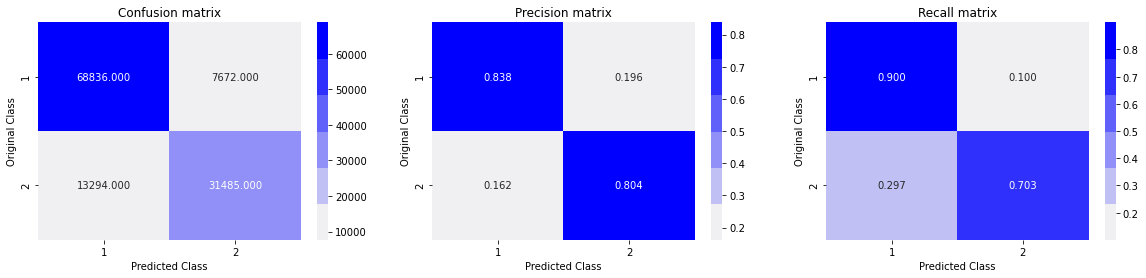

In [28]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [ ]:
"""
'frequency_of_question1',
 'frequency_of_question2',
 'character_in_question1',
 'character_in_question2',
 'word_in_question1',
 'word_in_question2',
 'common_words_in_both_questions',
 'total_words_in_both_questions',
 'common_share_word_percentage',
 'sum_of_frequency',
 'difference_of_frequency',
 'common_word_count_min',
 'common_word_count_max',
 'common_stop_count_min',
 'common_stop_count_max',
 'common_token_count_min',
 'common_token_count_max',
 'is_first_token_match',
 'is_last_token_match',
 'mean_token',
 'fuzz_ratio',
 'fuzz_partial_ratio',
 'fuzz_sort_ratio',
 'fuzz_set_ratio',
 'lcs_token_min',
"""
